<a href="https://colab.research.google.com/github/milydiazmarquez605-wq/Estadistica2025B/blob/main/U4_Practica_1_Mily_D%C3%ADaz_de_Le%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/milydiazmarquez605-wq/Estadistica2025B/refs/heads/main/Student_Performance_new.csv"
df = pd.read_csv(url)

df = df.dropna()

df

,Unnamed: 0,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo
0,0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer
1,1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer
2,2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer
3,3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre
4,4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre
...,...,...,...,...,...,...,...,...,...
995,995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer
996,996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre
997,997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer
998,998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer


In [3]:
#c) Modelo ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols('porcentaje_de_matematicas ~ C(etnia) + C(nivel_educativo_de_los_padres) + C(tipo_de_comida) + C(curso_de_preparación_para_el_examen) + porcentaje_de_matematicas + porcentaje_de_lectura + porcentaje_de_escritura + C(sexo)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(etnia),4.0,1.272882e+00,3.182204e-01,4.794690e+29,0.000000
C(nivel_educativo_de_los_padres),5.0,5.759693e-01,1.151939e-01,1.735649e+29,0.000000
C(tipo_de_comida),1.0,2.692468e+00,2.692468e+00,4.056794e+30,0.000000
C(curso_de_preparación_para_el_examen),1.0,6.958409e-01,6.958409e-01,1.048437e+30,0.000000
C(sexo),1.0,6.147862e-01,6.147862e-01,9.263106e+29,0.000000
porcentaje_de_matematicas,1.0,1.711696e+01,1.711696e+01,2.579047e+31,0.000000
porcentaje_de_lectura,1.0,4.624158e-31,4.624158e-31,6.967310e-01,0.404087
porcentaje_de_escritura,1.0,1.171736e-30,1.171736e-30,1.765477e+00,0.184251
Residual,984.0,6.530743e-28,6.636934e-31,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0182 0.8724 -0.0336 0.0701  False
group_A group_C   0.0283 0.4968   -0.02 0.0767  False
group_A group_D   0.0573 0.0138  0.0078 0.1068   True
group_A group_E   0.1219    0.0  0.0672 0.1766   True
group_B group_C   0.0101 0.9452 -0.0269 0.0471  False
group_B group_D   0.0391  0.044  0.0006 0.0776   True
group_B group_E   0.1037    0.0  0.0587 0.1486   True
group_C group_D    0.029  0.129 -0.0047 0.0626  False
group_C group_E   0.0936    0.0  0.0527 0.1345   True
group_D group_E   0.0646 0.0003  0.0223 0.1068   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

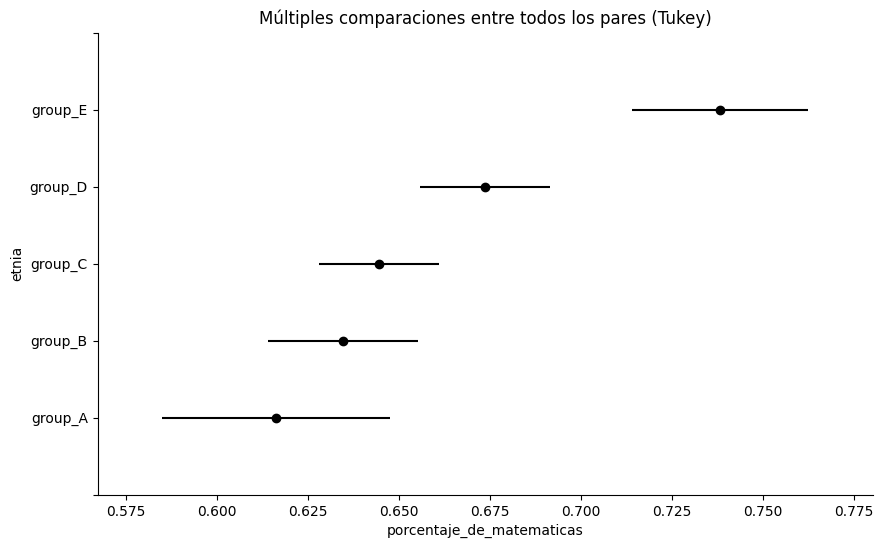

In [4]:
#Test de Tukey y codificación
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'],
    groups=df['etnia'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="etnia", xlabel="porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0363 0.1482 -0.0064   0.079  False
algo_de_preparatoria        licenciatura   0.0589 0.0119  0.0083  0.1096   True
algo_de_preparatoria            maestria   0.0625 0.0611 -0.0016  0.1266  False
algo_de_preparatoria        preparatoria  -0.0136 0.9515 -0.0577  0.0306  False
algo_de_preparatoria    tecnico_asociado   0.0439 0.0418   0.001  0.0868   True
 algo_de_universidad        licenciatura   0.0226 0.7676 -0.0259  0.0711  False
 algo_de_universidad            maestria   0.0262 0.8384 -0.0363  0.0886  False
 algo_de_universidad        preparatoria  -0.0499 0.0086 -0.0916 -0.0082   True
 algo_de_universidad    tecnico_asociado   0.0075 0.9948 -0.0328  0.0479  False
        licenciatura            maestria

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

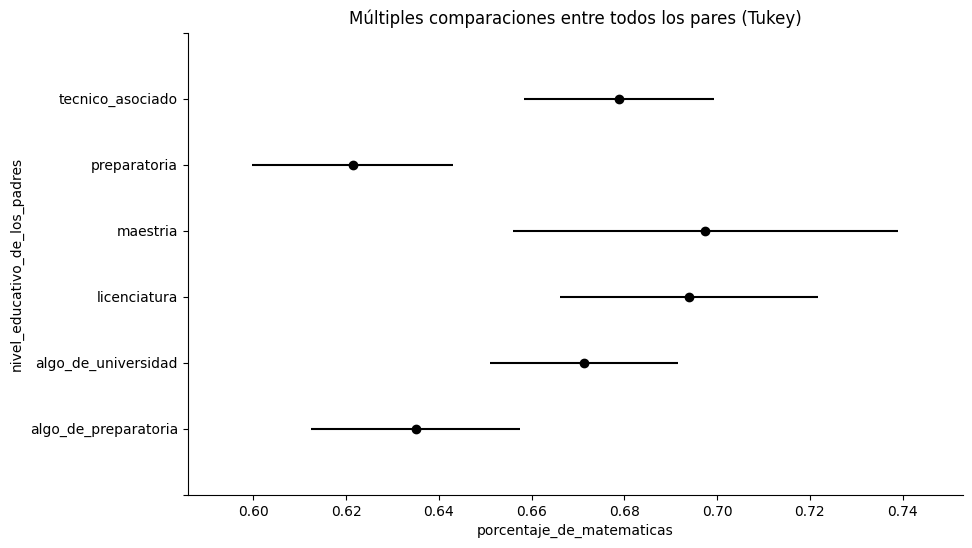

In [5]:
#Test de Tukey y codificación
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'],
    groups=df['nivel_educativo_de_los_padres'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="nivel_educativo_de_los_padres", xlabel="porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado  -0.1111   0.0 -0.1296 -0.0927   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

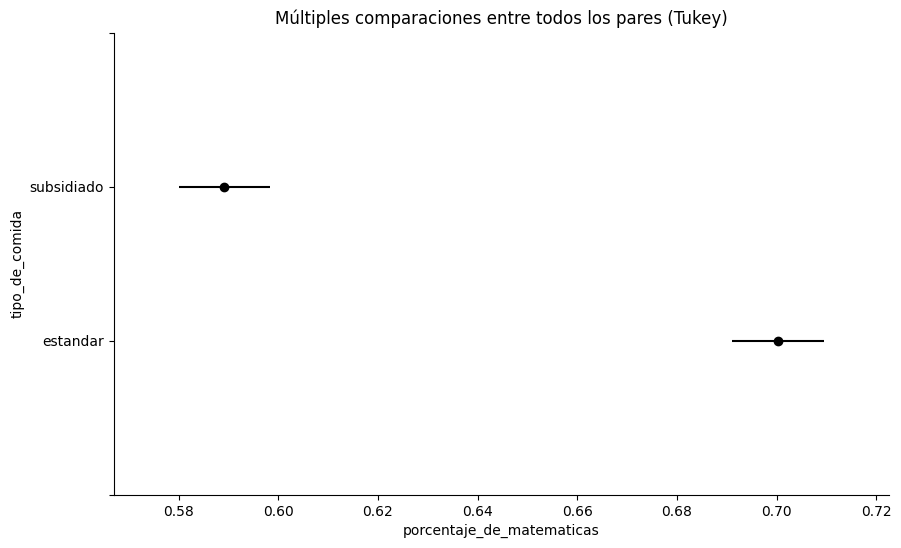

In [6]:
#Test de Tukey y codificación
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'],
    groups=df['tipo_de_comida'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tipo_de_comida", xlabel="porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0562   0.0 -0.0755 -0.0369   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

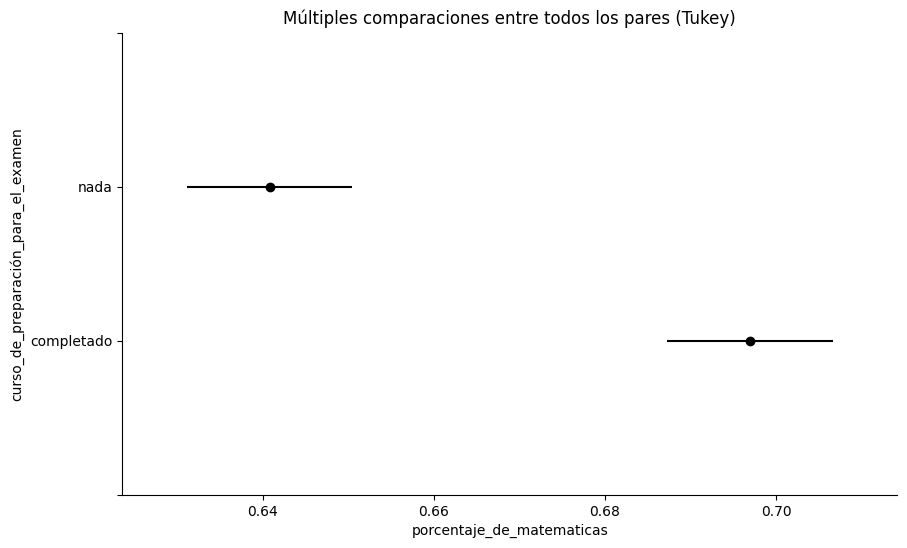

In [7]:
#Test de Tukey y codificación
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'],
    groups=df['curso_de_preparación_para_el_examen'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="curso_de_preparación_para_el_examen", xlabel="porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
hombre  mujer   -0.051   0.0 -0.0695 -0.0324   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

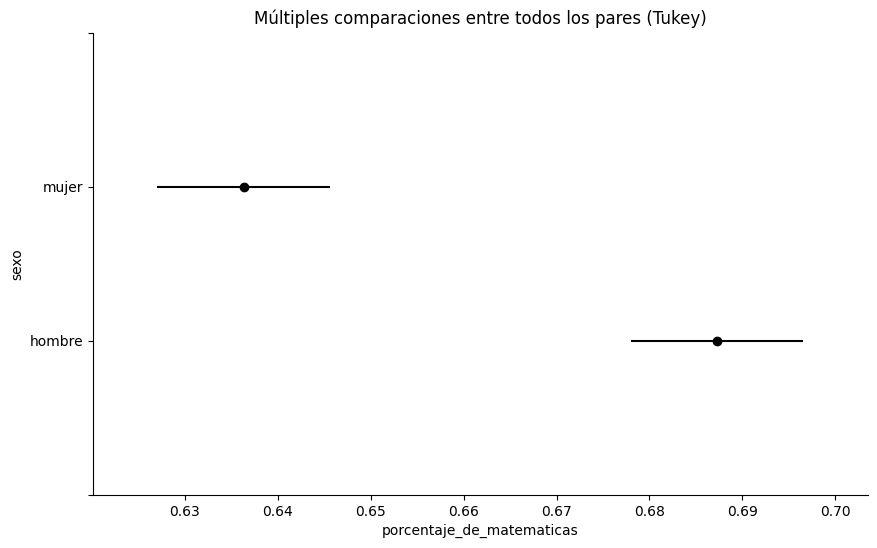

In [8]:
#Test de Tukey y codificación
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'],
    groups=df['sexo'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="sexo", xlabel="porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")